In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/insurance.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
# check no na
print(df.isna().sum())

print(df['region'].value_counts())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [8]:
print(df.groupby(by='region')['charges'].mean())

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [11]:
df_regressor = df[['age','sex','children','smoker','region']]
print(df_regressor.head())

   age     sex  children smoker     region
0   19  female         0    yes  southwest
1   18    male         1     no  southeast
2   28    male         3     no  southeast
3   33    male         0     no  northwest
4   32    male         0     no  northwest


(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

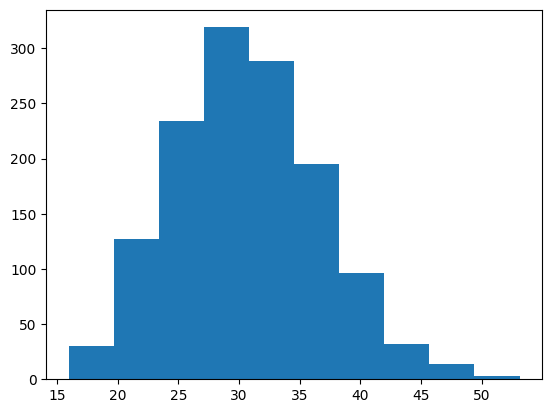

In [15]:
plt.hist(df['bmi'])

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [33]:
X_raw = pd.get_dummies(df_regressor, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_raw, df['bmi'], train_size=0.9)


In [34]:
linear_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

32.38762927679599
0.08472319322506572


In [42]:
param_grid = {'n_estimators':[25, 50], 'max_depth':[2,4,8,16], 'criterion':['squared_error', 'absolute_error']}

rf_model = RandomForestRegressor()
search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

search.fit(X_train, y_train)
print(search.best_params_)

{'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 50}
